<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [38]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-03-07 23:20:05--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.4’

m4_survey_data.sqli 100%[===================>]  34.98M  36.4MB/s    in 1.0s    

2024-03-07 23:20:06 (36.4 MB/s) - ‘m4_survey_data.sqlite.4’ saved [36679680/36679680]



Connect to the database.


In [39]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [40]:
import pandas as pd

In [41]:
#Import Primary Modules:
import numpy as np  # useful for many scientific computing in Python

# use the inline backend to generate the plots within the browser
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')  # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.5.3


## Demo: How to run an sql query


In [42]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [43]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [44]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [45]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [46]:
# your code goes here

# query data and load into a dataframe
QUERY = """
SELECT *
FROM master
"""
df_cc = pd.read_sql_query(QUERY,conn)

print("Dataframe shape: ", df_cc.shape)

df_cc['ConvertedComp'].head()

Dataframe shape:  (11398, 63)


0     61000.0
1     95179.0
2     90000.0
3    455352.0
4     65277.0
Name: ConvertedComp, dtype: float64

[10475   238   115   125    99   131    34    15    15   151]
[      0.  200000.  400000.  600000.  800000. 1000000. 1200000. 1400000.
 1600000. 1800000. 2000000.]


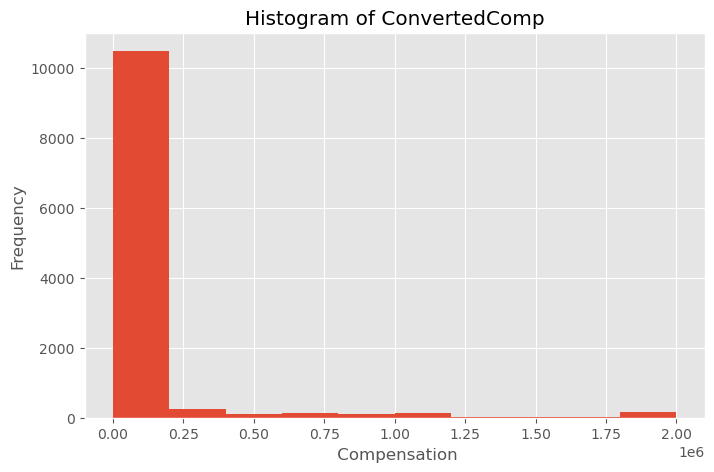

In [47]:
# replace null values with mean
if df_cc['ConvertedComp'].isnull().values.any():
    mean_cc = df_cc["ConvertedComp"].mean()
    df_cc['ConvertedComp'].fillna(mean_cc, inplace = True)
    
# set the histogram bin and frequency values
count, bin_edges = np.histogram(df_cc['ConvertedComp'])
print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

# plot the histogram
df_cc['ConvertedComp'].plot(kind='hist', figsize=(8, 5))
plt.title('Histogram of ConvertedComp') # add a title to the histogram
plt.ylabel('Frequency') # add y-label
plt.xlabel(' Compensation') # add x-label
plt.show()

### Box Plots


Plot a box plot of `Age.`


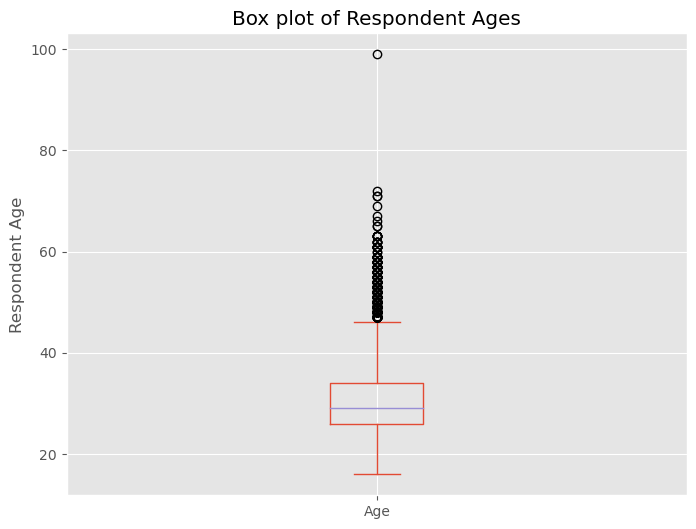

In [48]:
# your code goes here
# replace null values with mean
if df_cc['Age'].isnull().values.any():
    mean_age = df_cc["Age"].mean()
    df_cc['Age'].fillna(mean_age, inplace = True)
    
df_cc['Age'].plot(kind='box', figsize=(8, 6))
plt.title('Box plot of Respondent Ages')
plt.ylabel('Respondent Age')
plt.show()


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


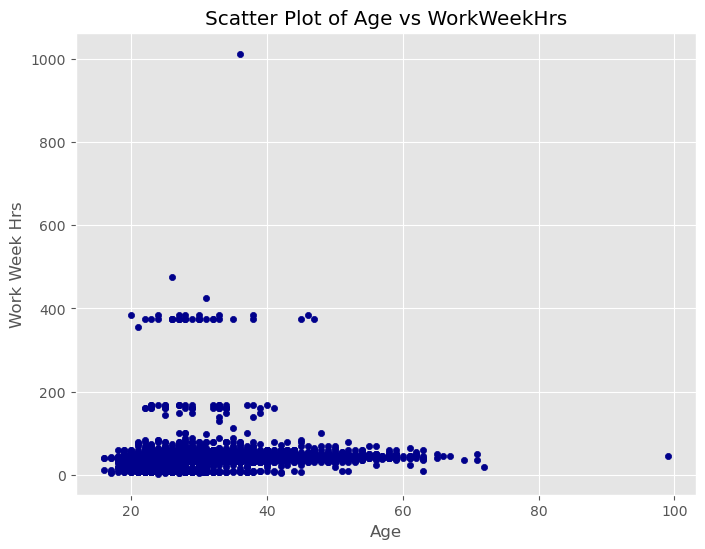

In [49]:
# your code goes here
# replace null values with mean
if df_cc['WorkWeekHrs'].isnull().values.any():
    mean_age = df_cc["WorkWeekHrs"].mean()
    df_cc['WorkWeekHrs'].fillna(mean_age, inplace = True)
    
df_cc.plot(kind='scatter', x='Age', y='WorkWeekHrs', figsize=(8, 6), color='darkblue')
plt.title('Scatter Plot of Age vs WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('Work Week Hrs')
plt.show()


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


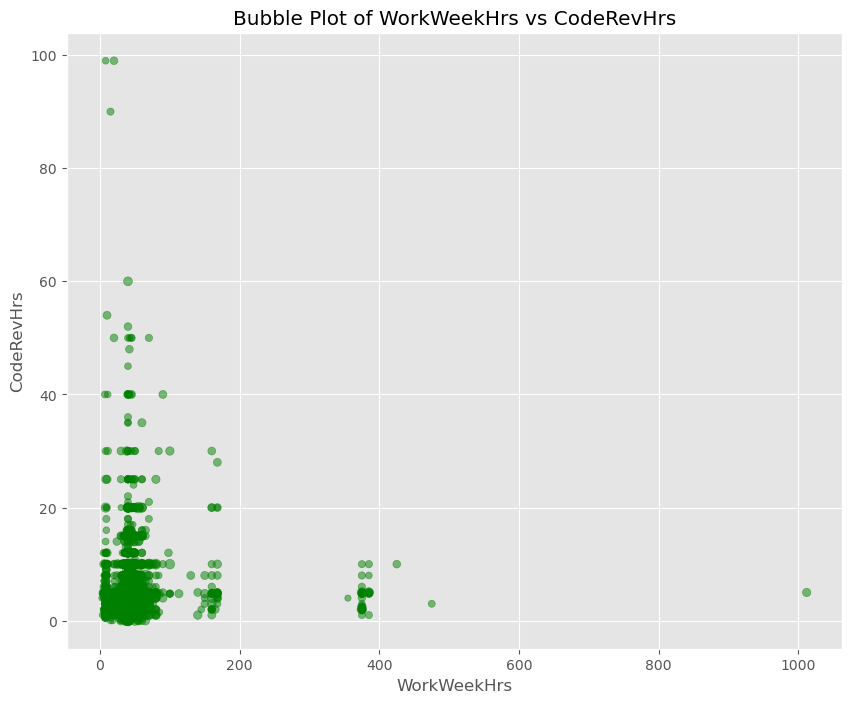

In [50]:
# your code goes here
# replace null values with mean
if df_cc['CodeRevHrs'].isnull().values.any():
    mean_age = df_cc["CodeRevHrs"].mean()
    df_cc['CodeRevHrs'].fillna(mean_age, inplace = True)

df_cc.plot(kind='scatter', x='WorkWeekHrs', y='CodeRevHrs', figsize=(10, 8), alpha=0.5, color='green', s='Age')

# show the graph
plt.title('Bubble Plot of WorkWeekHrs vs CodeRevHrs')
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.show()


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [66]:
table_name = 'DevType'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df_dev = pd.read_sql_query(QUERY,conn)
print(df_dev.iat[0,0])

CREATE TABLE "DevType" (
"Respondent" INTEGER,
  "DevType" TEXT
)


In [67]:
QUERY = """
SELECT DevType, COUNT(*) as Count
FROM DevType
group by DevType
order by Count desc
"""
df_dev2 = pd.read_sql_query(QUERY,conn)
df_dev2.head(5)

,DevType,Count
0,"Developer, full-stack",6928
1,"Developer, back-end",6290
2,"Developer, front-end",3920
3,"Developer, desktop or enterprise applications",2575
4,"Developer, mobile",1959


In [51]:
table_name = 'DatabaseDesireNextYear'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df_pie = pd.read_sql_query(QUERY,conn)
print(df_pie.iat[0,0])

CREATE TABLE "DatabaseDesireNextYear" (
"Respondent" INTEGER,
  "DatabaseDesireNextYear" TEXT
)


In [59]:
# return top 5 databases
QUERY = """
SELECT DatabaseDesireNextYear, COUNT(*) as Count
FROM DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by Count desc
"""
df_pie2 = pd.read_sql_query(QUERY,conn)
df_pie2.head(5)


,DatabaseDesireNextYear,Count
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856


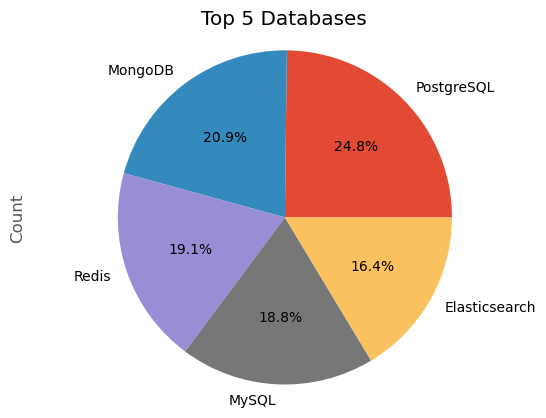

In [53]:
# your code goes here
# autopct create %, start angle represent starting point
df_top5 = df_pie2.head(5)

df_top5['Count'].plot(kind='pie', autopct='%1.1f%%', labels=df_top5['DatabaseDesireNextYear'])
plt.title('Top 5 Databases')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


Dataframe shape:  (11398, 3)


<Figure size 1000x600 with 0 Axes>

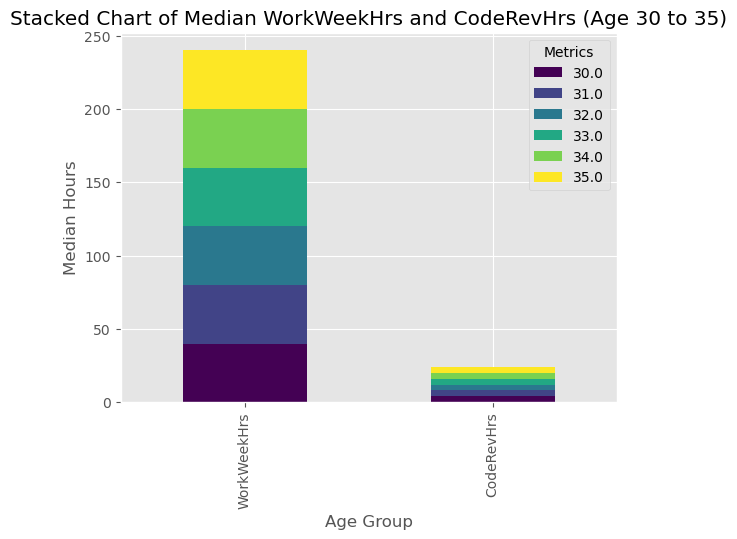

In [54]:
# your code goes here
QUERY = """
SELECT Age,WorkWeekHrs,CodeRevHrs
FROM master
"""
df_stack = pd.read_sql_query(QUERY,conn)

print("Dataframe shape: ", df_stack.shape)

df_filtered = df_stack[(df_stack['Age'] >= 30) & (df_stack['Age'] <= 35)]
df_medians = df_filtered.groupby('Age').median()
#df_medians[['WorkWeekHrs', 'CodeRevHrs']].plot(kind='bar', figsize=(10, 6), stacked=True)
#plt.xlabel('Age')
#plt.ylabel('Hours')
#plt.title('Median Hours by Age (30-35)')
#plt.show()

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
df_medians[['WorkWeekHrs', 'CodeRevHrs']].T.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Stacked Chart of Median WorkWeekHrs and CodeRevHrs (Age 30 to 35)')
plt.xlabel('Age Group')
plt.ylabel('Median Hours')
plt.legend(title='Metrics', loc='upper right')
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


Dataframe shape:  (11398, 2)


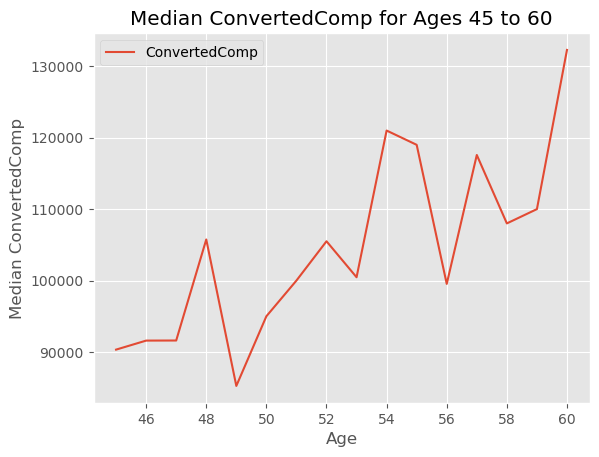

In [65]:
# your code goes here
QUERY = """
SELECT Age, ConvertedComp
FROM master
"""
df_line = pd.read_sql_query(QUERY,conn)

print("Dataframe shape: ", df_line.shape)

df_filtered1 = df_line[(df_line['Age'] >= 45) & (df_line['Age'] <= 60)]
df_medians1 = df_filtered1.groupby('Age').median() # Group by age and calculate the median for 'ConvertedComp'
df_medians1.plot(kind='line')
plt.title('Median ConvertedComp for Ages 45 to 60')
plt.xlabel('Age')
plt.ylabel('Median ConvertedComp')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


                                                    MainBranchNo
MainBranch                                                      
I am not primarily a developer, but I write cod...           780
I am a developer by profession                             10618


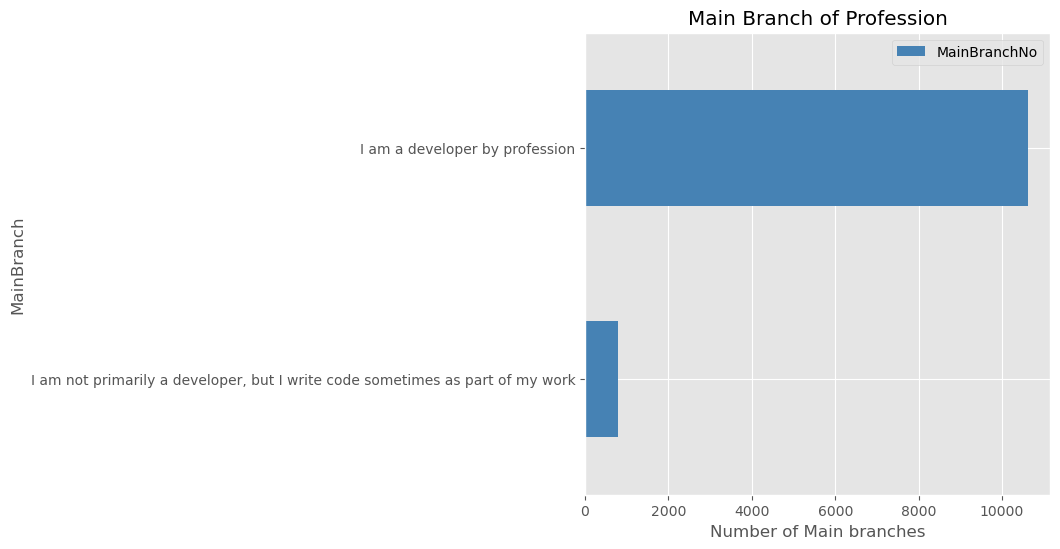

In [56]:
# your code goes here
QUERY = """
SELECT MainBranch, Count(*) as MainBranchNo
FROM master
group by MainBranch
order by MainBranchNo
"""
df_barh = pd.read_sql_query(QUERY,conn)

df_barhInd = df_barh.set_index('MainBranch') # Set MainBranch as index to use for y-tick label
print(df_barhInd)

# generate plot
df_barhInd.plot(kind='barh', figsize=(6, 6), color='steelblue')
plt.xlabel('Number of Main branches')
plt.title('Main Branch of Profession')
plt.show()

Close the database connection.


In [34]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
